# STATISTICAL ANALYSIS ON FACTORS INFLUENCING LIFE EXPECTANCY 

BY

Group P17
1. Ahmad Mustapha Wali (407), ahmadmwali@gmail.com
2. Lara Tomeh (407), lolyta__@live.com
3. Alexandru-Ștefan Ghiță (407), alexandru.stefan.ghita@gmail.com

Being our project for Exploratory Data Analysis

#ABOUT THE DATASET

The Global Health Observatory (GHO) data repository under World Health Organization (WHO) keeps track of the health status as well as many other related factors for all countries. The datasets are made available to the public for the purpose of health data analysis. The dataset related to life expectancy, health factors for 193 countries has been collected from the same WHO data repository website and its corresponding economic data was collected from United Nation website. Among all categories of health-related factors only those critical factors were chosen which are more representative. It has been observed that in the past 15 years, there has been a huge development in health sector resulting in improvement of human mortality rates especially in the developing nations in comparison to the past 30 years. Therefore, in this project we have considered data from year 2000-2015 for 193 countries for further analysis. The individual data files have been merged together into a single dataset. On initial visual inspection of the data showed some missing values. As the datasets were from WHO, we found no evident errors. Missing data was handled in R software by using Missmap command. The result indicated that most of the missing data was for population, Hepatitis B and GDP. The missing data were from less known countries like Vanuatu, Tonga, Togo,Cabo Verde etc. Finding all data for these countries was difficult and hence, it was decided that we exclude these countries from the final model dataset. The final merged file(final dataset) consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:​Immunization related factors, Mortality factors, Economical factors and Social factors.



# COLUMNS

•	country - the country from which the indicators originate

•	year - the calendar year in which the indicators were created

•	status - whether a country is classified as 'Developing' or 'Developed' by the World Health Organization

•	life_expectancy - the life expectancy of a person in years for a specific country and year

•	adult_mortality - the adult mortality rate as a percentage of the total population (i.e. number of people dying between 15 and 60 years per 1000 population)

•	infant_deaths - Infant mortality rate per 1000 population

•	alcohol- The rate of alcohol consumption in a nation is expressed in liters of pure alcohol consumed per capita.

•	percentage_expenditure - health expenditures as a proportion of GDP 

•	hepatitis_b - Number of one-year-olds immunized against Hepatitis B as a percentage of all one-year-olds in the population

•	measles - Measles cases recorded per 1000 population

•	bmi - A country's whole population's average Body Mass Index (BMI).

•	under-five_deaths - number of people under the age of five deaths per 1000 population

•	polio - The proportion of one-year-olds immunized against Polio compared to the total population of one-year-olds

•	total_expenditure - Health expenditures as a proportion of overall government spending

•	diphtheria - Immunization rate of one-year-olds against diphtheria, tetanus toxoid, and pertussis (DTP3)

•	hiv/aids - HIV/AIDS-related deaths per 1000 live births among children under the age of five; number of children under the age of five that die as a result of HIV/AIDS per 1000 live births

•	gdp - Gross Domestic Product per capita

•	population - population of a country

•	thinness_1-19_years - rate of thinness among people aged 10-19 

•	thinness_5-9_years - rate of thinness among people aged 5-9

•	income_composition_of_resources - Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

•	schooling - average number of years of schooling of a population


# INSPIRATION

The data-set aims to answer the following key questions:

1. Does various predicting factors which has been chosen initially really affect the Life expectancy? 

2. What are the predicting variables actually affecting the life expectancy?

3. Should a country having a lower life expectancy value(<65) increase its healthcare expenditure in order to improve its average lifespan?

4. How does Infant and Adult mortality rates affect life expectancy?

5. Does Life Expectancy has positive or negative correlation with eating habits, lifestyle, exercise, smoking, drinking alcohol etc.

6. What is the impact of schooling on the lifespan of humans?

7. Does Life Expectancy have positive or negative relationship with drinking alcohol?

8. Do densely populated countries tend to have lower life expectancy?

9. What is the impact of Immunization coverage on life Expectancy?

**These questions will be answered in the concluding section at the end of the document.**

#LOADING AND DESCRIBING THE DATASET

In [ ]:
#Installing the DataPrep library for Auto EDA
!pip install dataprep

In [ ]:
#installing statsmodels for which will be used to calculate p-values
!pip install statsmodels

In [ ]:
#Importing the relevant libraries and modules
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import lightgbm as lgb
import scipy.stats as stats
from sklearn.svm import SVR
import matplotlib.pyplot as plt
from dataprep.eda import create_report
from sklearn.linear_model import Ridge
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import (GridSearchCV)
from sklearn.ensemble import (RandomForestRegressor)
from sklearn.model_selection import train_test_split
from statsmodels.tools.eval_measures import mse, rmse
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error,explained_variance_score

In [ ]:
#importing the dataset as a CSV file delimited by commas
dataset = pd.read_csv("/content/Life Expectancy Data.csv", delimiter = ',')

In [ ]:
#displaying the first 5 rows of the dataset
dataset.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [ ]:
#checking the number of rows and columns of the dataset
dataset.shape

(2938, 22)

It could be observed that the dataset contains 2938 rows and 22 columns


In [ ]:
#printing the dataset's column names 
dataset.columns.values

array(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure',
       'Hepatitis B', 'Measles ', ' BMI ', 'under-five deaths ', 'Polio',
       'Total expenditure', 'Diphtheria ', ' HIV/AIDS', 'GDP',
       'Population', ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'], dtype=object)

On inspecting the column names in the dataset, some irregularities can be observed. Several of the columns, e.g '*under-five deaths ' and 'Hepatitis B*', are not consistent with regards to spacing. The columns will be renamed for better consistency. '* thinness 1-19 years*' will also be renamed to '*Thinness_10_19_years*' since it is most likely a mistake considering another column exists as '*thinness 5-9 years*'. 

In [ ]:
#Column name-fixes
dataset.rename(columns = {   
                            " BMI ":                             "BMI", 
                            "Life expectancy ":                  "Life_expectancy",
                            "Adult Mortality":                   "Adult_mortality",
                            "infant deaths":                     "Infant_deaths",
                            "percentage expenditure":            "Percentage_expenditure",
                            "Hepatitis B":                       "HepatitisB",
                            "Measles ":                          "Measles",
                            "under-five deaths ":                "Under_five_deaths",
                            "Total expenditure":                 "Total_expenditure",
                            "Diphtheria ":                       "Diphtheria",
                            " thinness  1-19 years":             "Thinness_10-19_years",
                            " thinness 5-9 years":               "Thinness_5-9_years",
                            " HIV/AIDS":                         "HIV/AIDS",
                            "Income composition of resources":   "Income_composition_of_resources"
                        }, 
              inplace = True)

In [ ]:
#printing the column names to verify the modifications
dataset.columns.values

array(['Country', 'Year', 'Status', 'Life_expectancy', 'Adult_mortality',
       'Infant_deaths', 'Alcohol', 'Percentage_expenditure', 'HepatitisB',
       'Measles', 'BMI', 'Under_five_deaths', 'Polio',
       'Total_expenditure', 'Diphtheria', 'HIV/AIDS', 'GDP', 'Population',
       'Thinness_10-19_years', 'Thinness_5-9_years',
       'Income_composition_of_resources', 'Schooling'], dtype=object)

In [ ]:
#printing the sum of null values per column
dataset.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life_expectancy                     10
Adult_mortality                     10
Infant_deaths                        0
Alcohol                            194
Percentage_expenditure               0
HepatitisB                         553
Measles                              0
BMI                                 34
Under_five_deaths                    0
Polio                               19
Total_expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
Thinness_10-19_years                34
Thinness_5-9_years                  34
Income_composition_of_resources    167
Schooling                          163
dtype: int64

We can observe 3 dtypes of floats, ints and objects. There are also many columns that contain null values. To fill the null values, linear interpolation will be used initially.

In [ ]:
#filling in null values via linear interpolation
dataset.reset_index(inplace=True)
dataset.groupby('Country').apply(lambda group: group.interpolate(method= 'linear'))

,index,Country,Year,Status,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
0,0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,27.1,42,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,26.7,41,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,26.3,40,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,25.9,39,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


Interpolation did not remove the null values, thus an alternative method of filling with the median value will be used.

In [ ]:
#trying another method of filling null values with the median of each column
imputed_data = []
for year in list(dataset.Year.unique()):
    year_data = dataset[dataset.Year == year].copy()
    for col in list(year_data.columns)[4:]:
        year_data[col] = year_data[col].fillna(year_data[col].dropna().median()).copy()
    imputed_data.append(year_data)
dataset = pd.concat(imputed_data).copy()

In [ ]:
#printing information about the dataset's index, dtype, columns, non-null values, and memory usage 
dataset.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2938 entries, 0 to 2937
Data columns (total 23 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   index                            2938 non-null   int64  
 1   Country                          2938 non-null   object 
 2   Year                             2938 non-null   int64  
 3   Status                           2938 non-null   object 
 4   Life_expectancy                  2938 non-null   float64
 5   Adult_mortality                  2938 non-null   float64
 6   Infant_deaths                    2938 non-null   int64  
 7   Alcohol                          2938 non-null   float64
 8   Percentage_expenditure           2938 non-null   float64
 9   HepatitisB                       2938 non-null   float64
 10  Measles                          2938 non-null   int64  
 11  BMI                              2938 non-null   float64
 12  Under_five_deaths   

In [ ]:
#checking for the columns that contain null values, and the number of null values per column
dataset.isnull().sum()

index                              0
Country                            0
Year                               0
Status                             0
Life_expectancy                    0
Adult_mortality                    0
Infant_deaths                      0
Alcohol                            0
Percentage_expenditure             0
HepatitisB                         0
Measles                            0
BMI                                0
Under_five_deaths                  0
Polio                              0
Total_expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
Thinness_10-19_years               0
Thinness_5-9_years                 0
Income_composition_of_resources    0
Schooling                          0
dtype: int64

In [ ]:
'''getting an overview of the dataset. The mean, standard deviation, min and max values, 
and the 4 quartiles are displayed here'''

dataset.describe()

,index,Year,Life_expectancy,Adult_mortality,Infant_deaths,Alcohol,Percentage_expenditure,HepatitisB,Measles,BMI,Under_five_deaths,Polio,Total_expenditure,Diphtheria,HIV/AIDS,GDP,Population,Thinness_10-19_years,Thinness_5-9_years,Income_composition_of_resources,Schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2.938000e+03,2938.000000,2938.000000,2938.000000,2938.000000
mean,1468.500000,2007.518720,69.238462,164.695031,30.303948,4.637600,738.251295,82.644656,2419.592240,38.386555,42.035739,82.605344,6.005061,82.374575,1.742103,6657.444137,1.024153e+07,4.822362,4.852689,0.630526,12.013513
std,848.271871,4.613841,9.510459,124.092441,117.926501,3.921306,1987.914858,22.881890,11467.272489,19.939693,160.445548,23.362728,2.416410,23.649290,5.077785,13284.996285,5.402084e+07,4.397466,4.485674,0.205378,3.267787
min,0.000000,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,734.250000,2004.000000,63.200000,74.000000,0.000000,1.082500,4.685343,82.000000,0.000000,19.400000,0.000000,78.000000,4.370000,78.000000,0.100000,580.486996,4.189172e+05,1.600000,1.600000,0.504250,10.300000
50%,1468.500000,2008.000000,72.100000,144.000000,3.000000,4.100000,64.912906,91.000000,17.000000,43.450000,4.000000,93.000000,5.895000,93.000000,0.100000,1791.067713,1.412669e+06,3.300000,3.300000,0.681000,12.300000
75%,2202.750000,2012.000000,75.600000,227.000000,22.000000,7.390000,441.534144,96.000000,360.250000,56.100000,28.000000,97.000000,7.330000,97.000000,0.800000,4779.405190,4.584371e+06,7.100000,7.200000,0.772000,14.100000
max,2937.000000,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


A brief inspection of the dataset description shows the presence of many outliers. Adult mortality of 0.1% seems unreasonable (min Adult_mortality = 1), and a country can not spend 19479.911610% of its income on health, etc. Various methods of checking and correcting outliers exist. For this project, we used boxplots for easy visual detection of the outliers, and winsorization to correct them. Both methods provide and easy and computationally-light-weight way of dealing with outliers.  

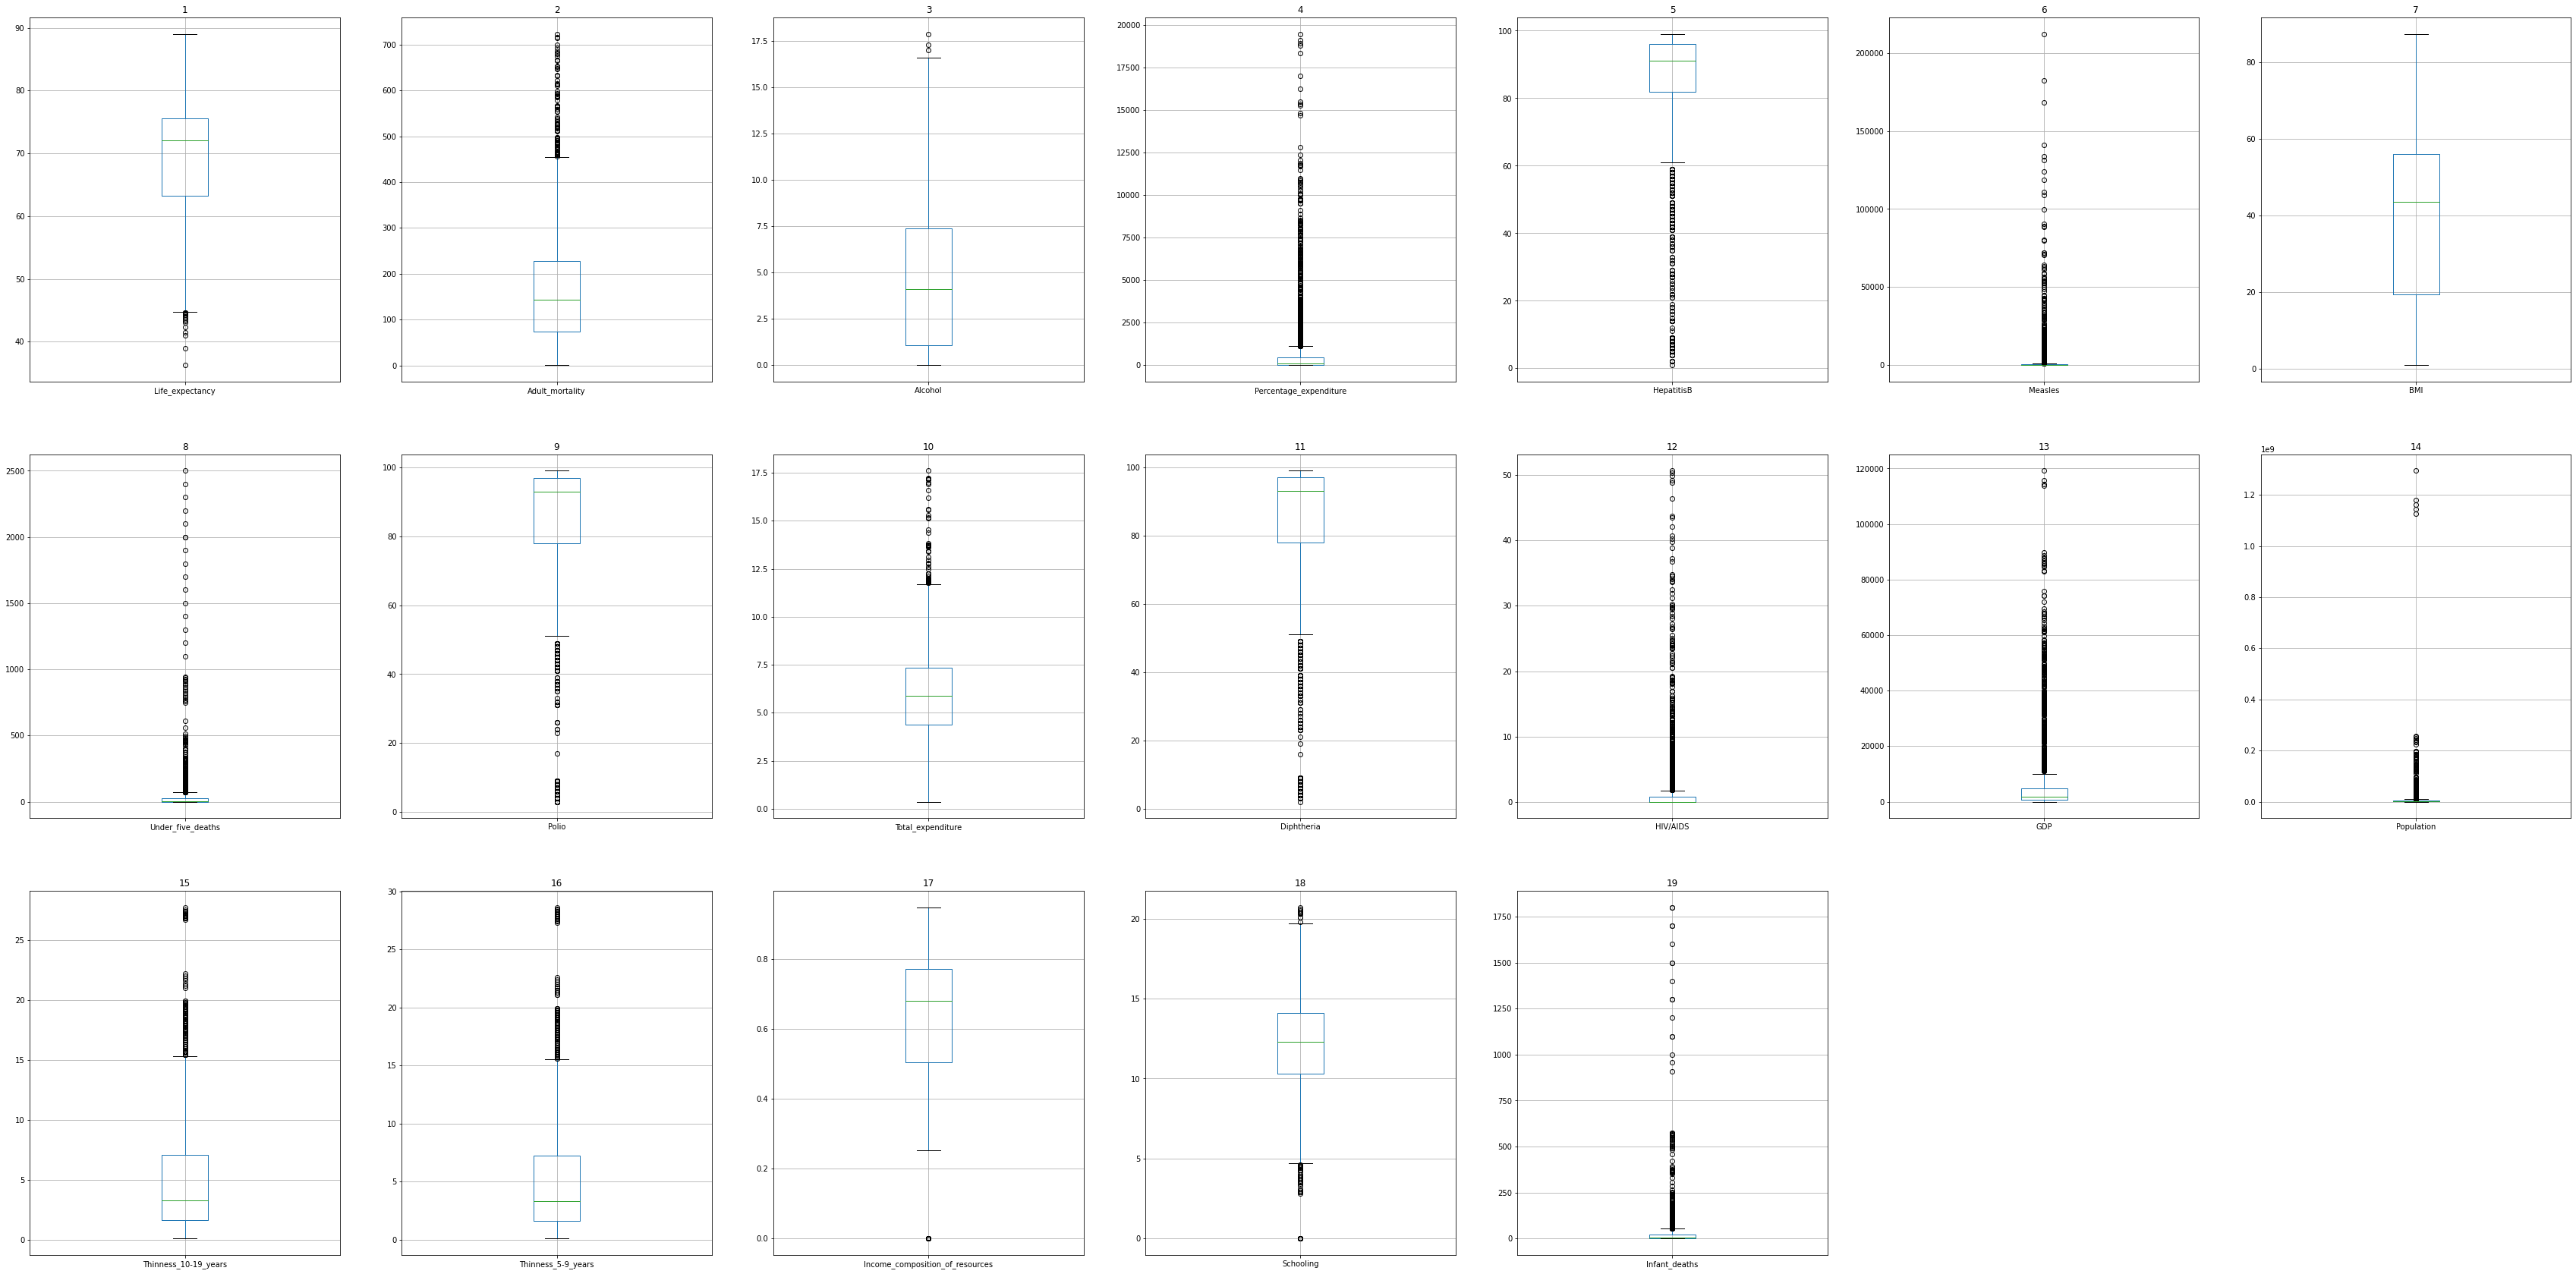

In [ ]:
#checking for outliers using boxplots

columns_list = [
                    'Life_expectancy',
                    'Adult_mortality',                  
                    'Alcohol',                          
                    'Percentage_expenditure',            
                    'HepatitisB',                       
                    'Measles',                           
                    'BMI',                               
                    'Under_five_deaths',             
                    'Polio',                            
                    'Total_expenditure',              
                    'Diphtheria',                    
                    'HIV/AIDS',                      
                    'GDP',                              
                    'Population',                        
                    'Thinness_10-19_years',             
                    'Thinness_5-9_years',              
                    'Income_composition_of_resources',   
                    'Schooling',                        
                    'Infant_deaths',                    
                    ]

fig = plt.figure(figsize=(60,30))


for i, col in enumerate(columns_list, start = 1):
    plt.subplot(3, 7, i)
    dataset.boxplot(col)
    plt.title(i)
    plt.grid(True)


There seems to be many outliers and irregularities with the dataset. 

i)'*Infant_deaths*', '*Measles*', and '*Under_five_deaths*', which are all per 1000 population (thus shouldn't be above 1000) all have values above 1000. To deal with this, we drop all values not less than 1000 since they are probably a mistake, and there is no way we can know their actual values.

ii) '*Percentage_expenditure*' is unreasonably high. Also '*Population*' and '*GDP*' have been affected by the few countries having a very high population of more than 1 billion (China and India) and GDP per capita (Qatar, Norway,etc.) respectively to create too many outliers. To deal with this category, we take the log of these columns. 

iii) For the rest of the columns with outliers, we winsorize them by changing their quartile limits.

In [ ]:
#dropping the abnormal data points
dataset = dataset[dataset['Infant_deaths'] < 1001]
dataset = dataset[dataset['Measles'] < 1001]
dataset = dataset[dataset['Under_five_deaths'] < 1001]

In [ ]:
#normalizing other abnormal data
dataset['log_Percentage_expenditure'] = np.log(dataset['Percentage_expenditure'])
dataset['log_Population'] = np.log(dataset['Population'])
dataset['log_GDP'] = np.log(dataset['GDP'])
dataset = dataset.replace([np.inf, -np.inf], 0)

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
'''Dealing with the outliers using Winsorization. The first argument in the tuple by the right 
is  the lower limits quartile, while the second is its upper limit'''
dataset['Life_Expectancy_Winsorized'] = winsorize(dataset['Life_expectancy'], (0.05,0))
dataset['Adult_Mortality_Winsorized'] = winsorize(dataset['Adult_mortality'], (0,0.04))
dataset['Alcohol_Winsorized'] = winsorize(dataset['Alcohol'], (0.0,0.01))
dataset['HepatitisB_Winsorized'] = winsorize(dataset['HepatitisB'], (0.2,0.0))
dataset['Polio_Winsorized'] = winsorize(dataset['Polio'], (0.20,0.0))
dataset['Total_Expenditure_Winsorized'] = winsorize(dataset['Total_expenditure'], (0.0,0.02))
dataset['Diphtheria_Winsorized'] = winsorize(dataset['Diphtheria'], (0.11,0.0))
dataset['HIV_AIDS_Winsorized'] = winsorize(dataset['HIV/AIDS'], (0.0,0.21))
dataset['Thinness_10_to_19_years_Winsorized'] = winsorize(dataset['Thinness_10-19_years'], (0.0,0.04))
dataset['Thinness_5_to_9_years_Winsorized'] = winsorize(dataset['Thinness_5-9_years'], (0.0,0.04))
dataset['Income_Composition_Of_Resources_Winsorized'] = winsorize(dataset['Income_composition_of_resources'], (0.05,0.0))
dataset['Schooling_Winsorized'] = winsorize(dataset['Schooling'], (0.03,0.01))

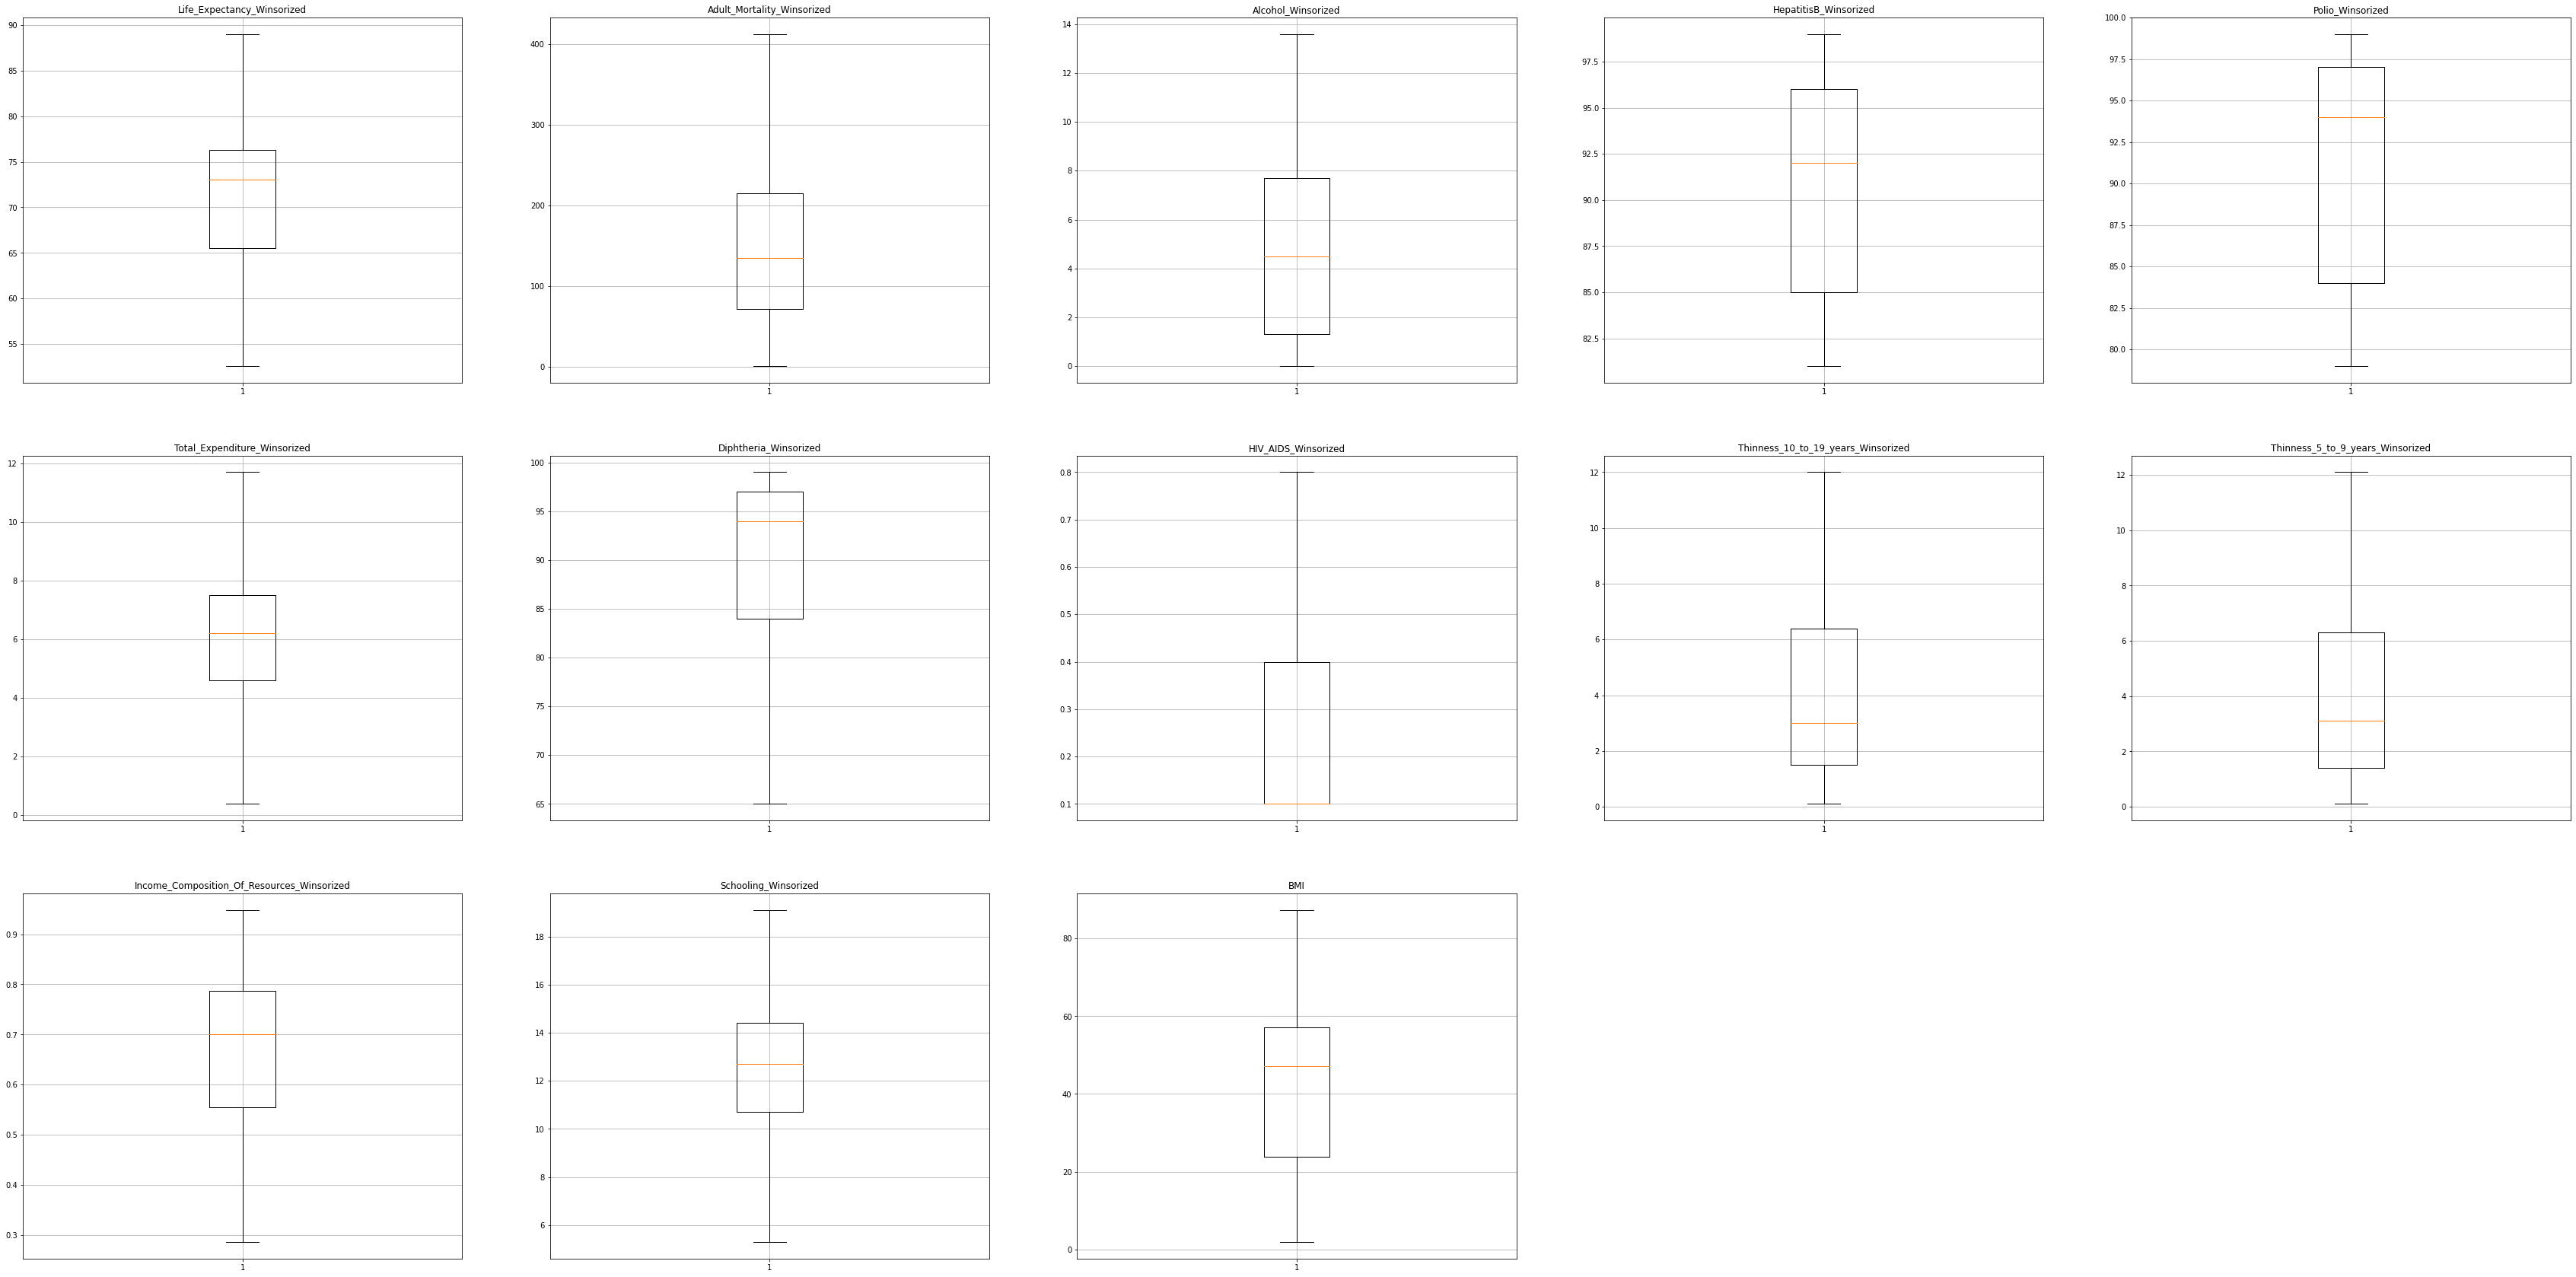

In [ ]:
#plotting the winsorized data
col_dict_winz = {
    
                'Life_Expectancy_Winsorized':1,
                'Adult_Mortality_Winsorized':2,
                'Alcohol_Winsorized':3,
                'HepatitisB_Winsorized':4,
                'Polio_Winsorized':5,
                'Total_Expenditure_Winsorized':6,
                'Diphtheria_Winsorized':7,
                'HIV_AIDS_Winsorized':8,
                'Thinness_10_to_19_years_Winsorized':9,
                'Thinness_5_to_9_years_Winsorized':10,
                'Income_Composition_Of_Resources_Winsorized':11,
                'Schooling_Winsorized':12,
                'BMI':13}


fig = plt.figure(figsize=(60, 30))
for variable,i in col_dict_winz.items():
                     plt.subplot(3,5,i)
                     plt.boxplot(dataset[variable])
                     plt.title(variable)
                     plt.ylabel('')
                     plt.grid(True)
    
plt.show()

A second boxplot of the winsorized data shows that the outliers have been removed.

In [ ]:
#creating another dataset with clean data

cleaned_dataset = dataset[[
    
    'Year', 
    'Country', 
    'Status',
    'Life_Expectancy_Winsorized',
    'Adult_Mortality_Winsorized',
    'Infant_deaths',
    'Alcohol_Winsorized',
    'BMI',
    'log_Percentage_expenditure',
    'HepatitisB_Winsorized',
    'Measles',
    'Under_five_deaths',
    'Polio_Winsorized',
    'Total_Expenditure_Winsorized',
    'Diphtheria_Winsorized',
    'HIV_AIDS_Winsorized',
    'log_GDP',
    'log_Population',
    'Thinness_10_to_19_years_Winsorized',
    'Thinness_5_to_9_years_Winsorized',
    'Income_Composition_Of_Resources_Winsorized',
    'Schooling_Winsorized']]

#DATA ANALYSIS

In [ ]:
#creating an EDA report using DataPrep

from dataprep.eda import create_report
report = create_report(cleaned_dataset, title='DataPrep Report')
report.save('DataPrep Report')

Report has been saved to DataPrep Report.html!


In [ ]:
#a description of the cleaned dataset
cleaned_dataset.describe(include = 'O')

,Country,Status
count,2413,2413
unique,190,2
top,Estonia,Developing
freq,16,1937


In [ ]:
#displaying the cleaned dataset's dimensions
cleaned_dataset.shape

(2413, 22)

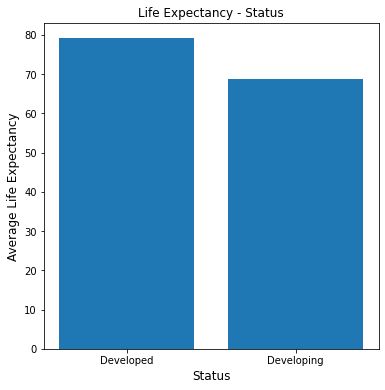

In [ ]:
#plotting the average life expectancy based on countries' status
plt.figure(figsize = (6, 6))
plt.bar(cleaned_dataset.groupby('Status')['Status'].count().index, cleaned_dataset.groupby('Status')['Life_Expectancy_Winsorized'].mean())
plt.xlabel("Status",fontsize = 12)
plt.ylabel("Average Life Expectancy", fontsize = 12)
plt.title("Life Expectancy - Status")
plt.show()

`Residents in developed countries have, on average, 10 years higher life expectancy than those in developing countries on average (70 years). As can also be observed in the figure below, the country with the lowest life expectancy is *Angola*, a developing country; while the one with the one with the highest is *France*, a developed country. On closer observation, most of the countries below the 75th percentile are developing countries, while most of those above it are developed nations.`

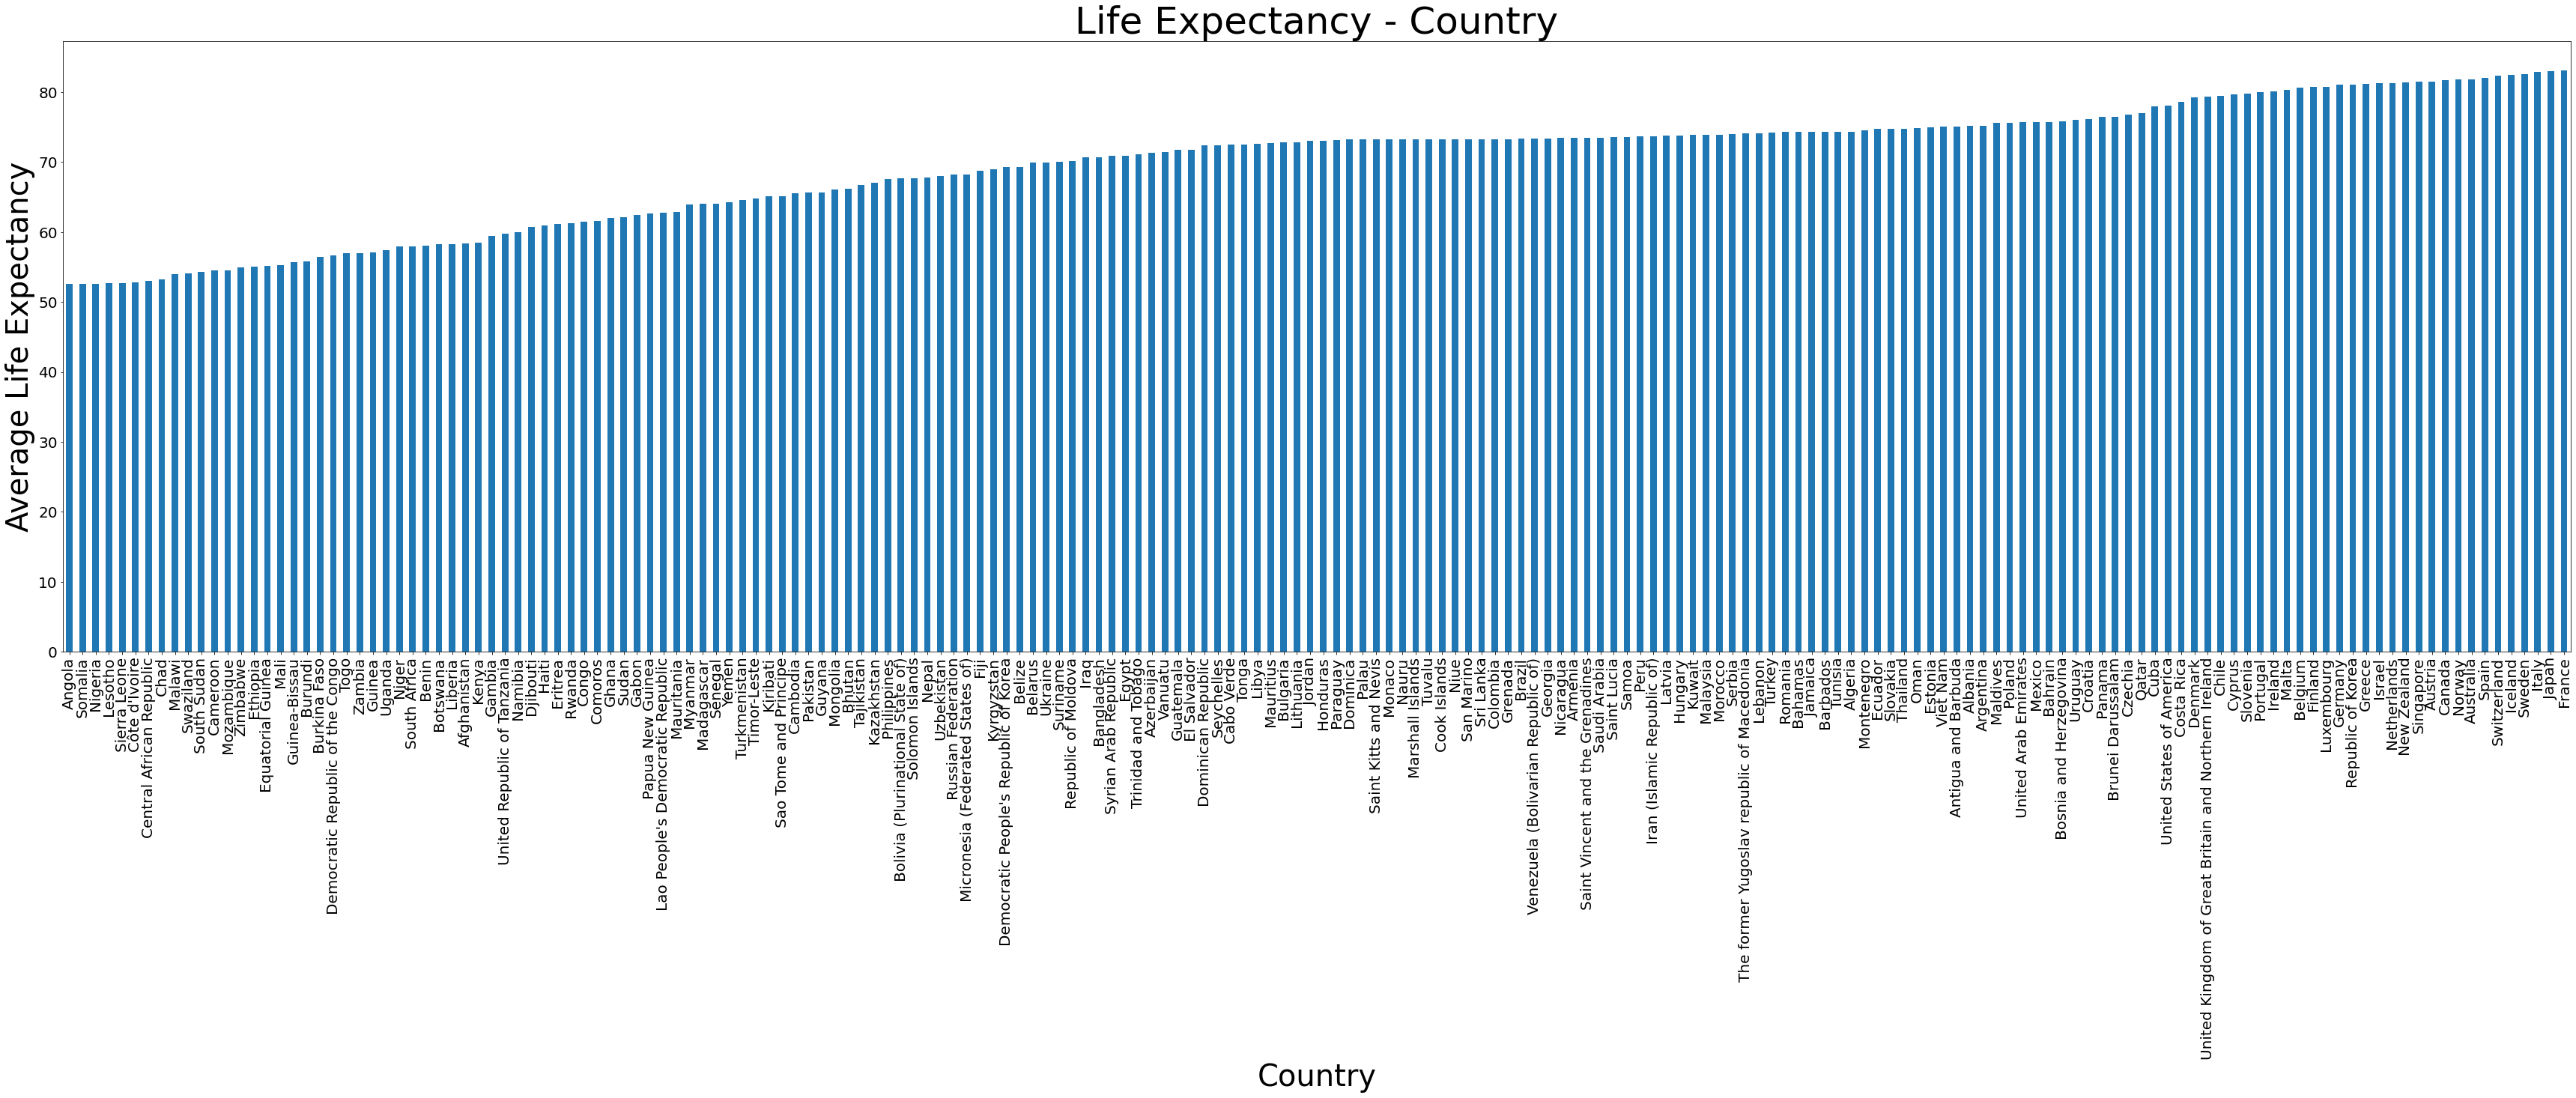

In [ ]:
#sorting the average life expectancy in ascending order per country 
country_and_life_expectancy = cleaned_dataset.groupby('Country')['Life_Expectancy_Winsorized'].mean().sort_values(ascending = True)
country_and_life_expectancy.plot(kind = 'bar', figsize = (60, 15), fontsize = 20)
plt.title("Life Expectancy - Country", fontsize = 50)
plt.xlabel("Country", fontsize = 40)
plt.ylabel("Average Life Expectancy", fontsize = 40)
plt.show()

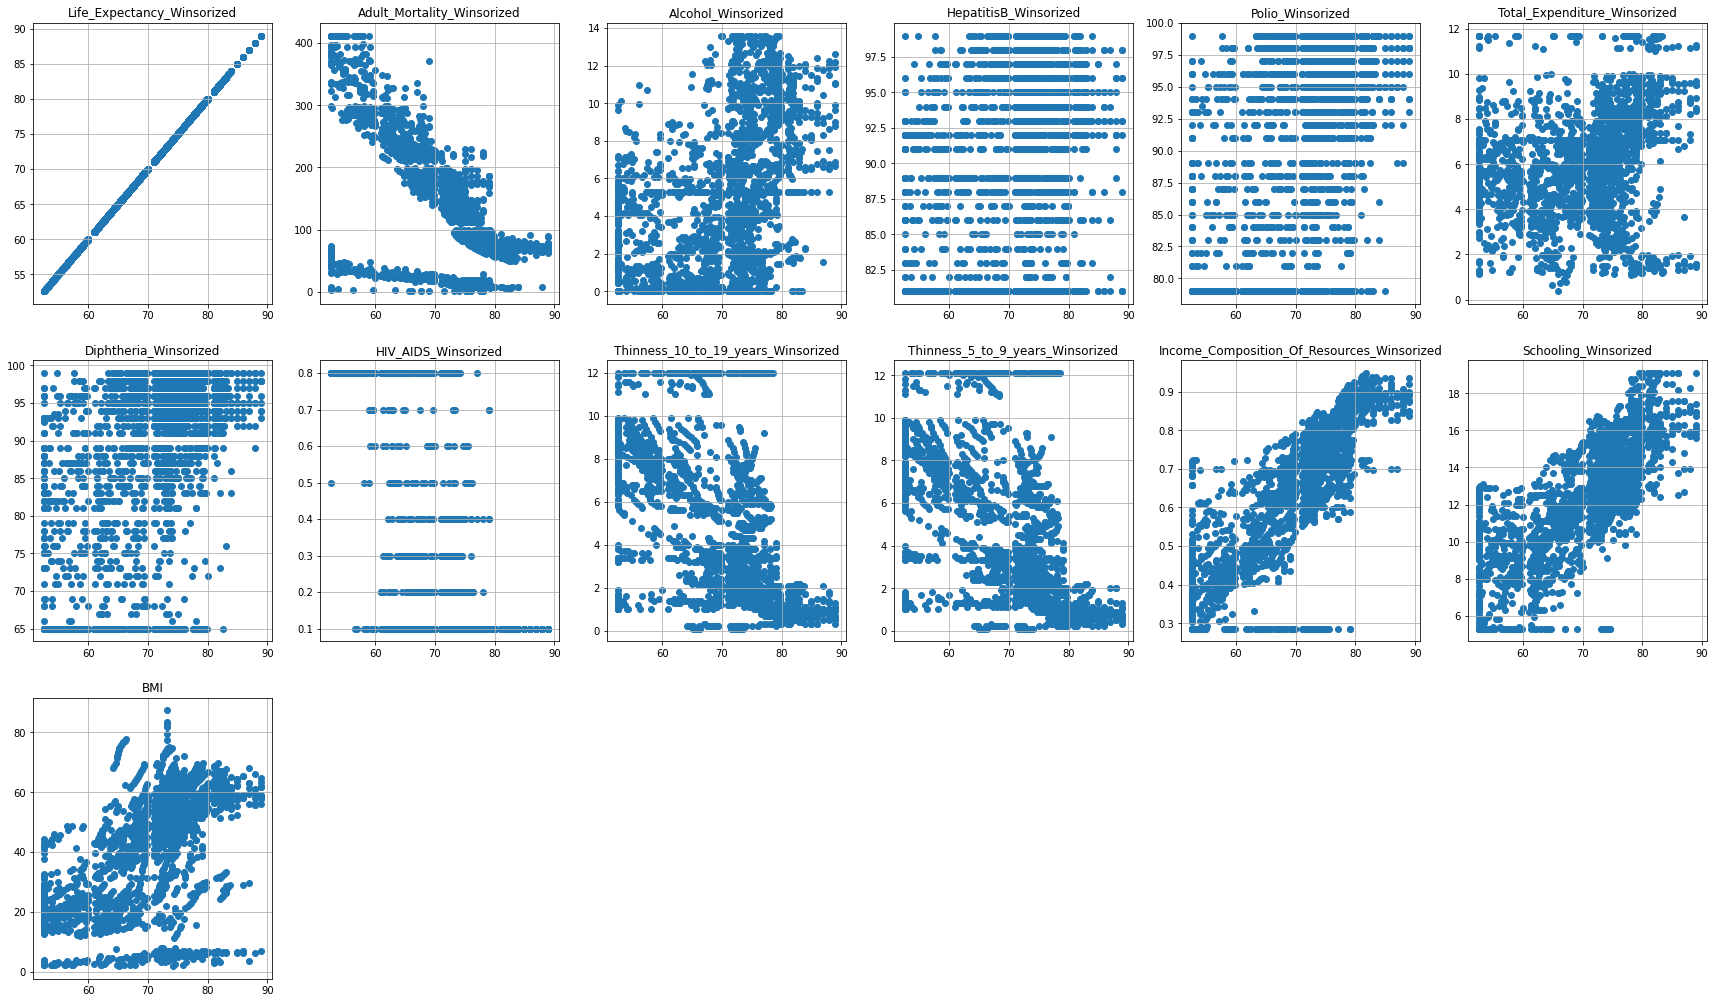

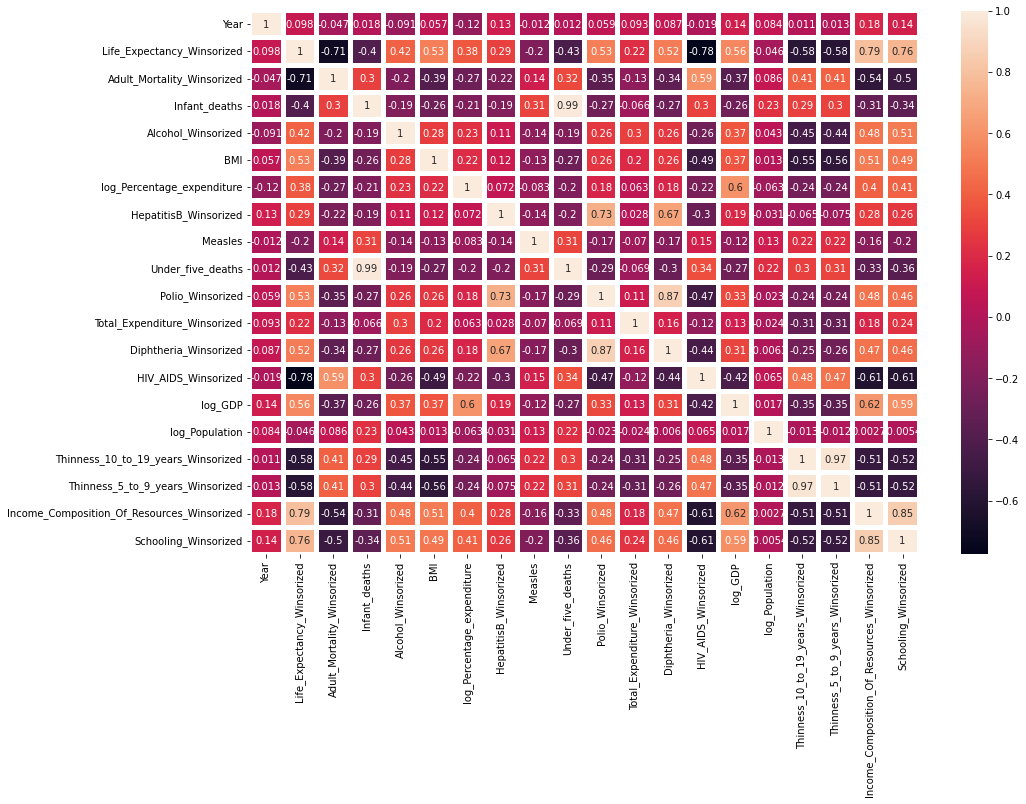

In [ ]:
# scatter plot of life expectancy against each of the other numerical variables
#Correlation heatmap of the columns
fig = plt.figure(figsize=(30,30))
for variable,i in col_dict_winz.items():
                     plt.subplot(5,6,i)
                     plt.scatter(cleaned_dataset["Life_Expectancy_Winsorized"], dataset[variable])
                     plt.title(variable)
                     plt.ylabel('')
                     
                     plt.grid(True)
    
plt.show()

plt.figure(figsize=(15,10))
sns.heatmap(cleaned_dataset.corr(), annot =True, linewidths = 4)

The 2 cells above indicate the correlations between a predictor and the other predictors. In the case of life expectancy, we can see that it has strong positive correlation with *Income_Composition_Of_resources* and *Schooling*. To a lesser extent, it is also affected positively by *Polio*, and *Diphtheria*. This is because polio and diphtheria immunization greatly reduces the chances of children dying from those ailments. It turns out that public heathcare expenditure is not the most important predictor determining life expectancy (weakly positively correlated by 0.22).

Life expectancy is also observed to be strongly negatively correlated with *Adult_mortality*, *HIV/AIDS*, *Thinness_10-19_Years*, and *Thinness_5-9_Years*. 

#FITTING THE DATASET INTO SOME MODELS

In [ ]:
#checking the p-values of the winsorized life expectancy
stats.ttest_ind(dataset.loc[dataset['Status'] == 'Developed', 'Life_Expectancy_Winsorized'], dataset.loc[dataset['Status'] == 'Developing', 'Life_Expectancy_Winsorized'])

Ttest_indResult(statistic=27.77681614551881, pvalue=1.448380291855275e-147)

In [ ]:
#creating a dummy variable for the 'Status' column
cleaned_dataset = pd.get_dummies(cleaned_dataset, columns = ['Status'])

In [ ]:
''' henceforth, the country column won't be needed for either training or testing, this will 
get dropped'''
cleaned_dataset = cleaned_dataset.drop('Country', axis = 1)

In [ ]:
#dataset shape after dropping the 'Country' column
cleaned_dataset.shape

(2413, 22)

In [ ]:
#scaling the dataset using the StandardScaler
scaler = StandardScaler()
dataset_scale = pd.DataFrame(scaler.fit_transform(cleaned_dataset), columns = cleaned_dataset.columns)

In [ ]:
#first 5 rows of the scaled dataset
dataset_scale.head()

,Year,Life_Expectancy_Winsorized,Adult_Mortality_Winsorized,Infant_deaths,Alcohol_Winsorized,BMI,log_Percentage_expenditure,HepatitisB_Winsorized,Measles,Under_five_deaths,Polio_Winsorized,Total_Expenditure_Winsorized,Diphtheria_Winsorized,HIV_AIDS_Winsorized,log_GDP,log_Population,Thinness_10_to_19_years_Winsorized,Thinness_5_to_9_years_Winsorized,Income_Composition_Of_Resources_Winsorized,Schooling_Winsorized,Status_Developed,Status_Developing
0,1.590836,0.836149,-0.724771,-0.423738,-0.077106,0.864344,0.630313,1.322297,-0.476067,-0.406496,1.087928,-0.056489,0.915893,-0.645931,0.371652,-1.523920,-0.884820,-0.845821,0.591271,0.587014,-0.495723,0.495723
1,1.590836,0.576506,-1.242473,0.437074,0.098160,0.941124,-1.467383,0.691630,-0.138986,0.271138,0.550905,0.408322,0.556820,-0.645931,0.397366,1.657154,0.616460,0.549870,0.479740,0.655153,-0.495723,0.495723
2,1.590836,-2.137945,1.731960,2.281671,0.098160,-0.911837,-1.467383,-1.515705,0.155291,2.360508,-1.597188,0.408322,-2.136227,1.775377,0.332296,0.486408,1.335824,1.294239,-0.764709,-0.366926,-0.495723,0.495723
3,1.590836,0.670922,-1.298950,-0.423738,0.098160,0.337120,-1.467383,1.322297,-0.476067,-0.406496,-0.657397,0.408322,0.915893,-0.300029,1.089523,0.357019,-0.228010,-0.225514,0.720412,0.484806,-0.495723,0.495723
4,1.590836,0.659120,-0.329435,-0.095810,0.098160,1.110040,-1.467383,0.533963,-0.476067,-0.152383,0.282393,0.408322,0.467052,-0.645931,1.085223,1.694641,-0.947373,-0.969882,0.966954,1.643163,-0.495723,0.495723


In [ ]:
'''Dividing the dataset into a set of features and a label. In this case, the features will be
all the columns in the 'Cleaned_Dataset' except 'Life_Expectancy_Winsorized', while the label
will be 'Life_Expectancy_Winsorized' '''

X = dataset_scale.drop(['Life_Expectancy_Winsorized'], axis = 1)
Y = cleaned_dataset['Life_Expectancy_Winsorized']

In [ ]:
'''splitting the dataset into 80% set of train features and labels, and 20% set of test 
features and labels.'''
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
######################################LINEAR REGRESSION MODEL###################################################################

In [ ]:
#creating a linear regression model
linearRegressionModel = LinearRegression()
linearRegressionModel.fit(X_train, Y_train)

LinearRegression()

In [ ]:
#training and predicting with the model
y_preds_train = linearRegressionModel.predict(X_train)
y_preds_test = linearRegressionModel.predict(X_test)

In [ ]:
#printing the model's performance metrics
print("R-squared of the model in training set is: {}".format(linearRegressionModel.score(X_train, Y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in test set is: {}".format(linearRegressionModel.score(X_test, Y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(Y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_preds_test) / Y_test)) * 100))

R-squared of the model in training set is: 0.8347355916192296
-----Test set statistics-----
R-squared of the model in test set is: 0.8455725605277428
Mean absolute error of the prediction is: 2.5116302020236723
Mean squared error of the prediction is: 11.688836694918866
Root mean squared error of the prediction is: 3.4188940748316354
Mean absolute percentage error of the prediction is: 3.727829037102558


In [ ]:
#printing the model's variance score
print(f"Explained Variance Score: {explained_variance_score(y_pred = linearRegressionModel.predict(X_train), y_true = Y_train)}")

Explained Variance Score: 0.8347355916192296


In [ ]:
####################################################################SUPPORT VECTOR REGRESSOR##############################################################################

In [ ]:
#Crating another model using a support vector regressor
svr_reg = SVR(kernel = 'rbf', C = 10, epsilon = 0.00001)
svr_reg.fit(X_train, Y_train)
y_predict_svr = svr_reg.predict(X_test)

In [ ]:
#printing the model's performance metrics
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_predict_svr)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_predict_svr)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_predict_svr) ** (1 / 2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_predict_svr) / Y_test)) * 100))

Mean absolute error of the prediction is: 1.4744458317622204
Mean squared error of the prediction is: 5.80719511464476
Root mean squared error of the prediction is: 2.409812257136385
Mean absolute percentage error of the prediction is: 2.1895327643167173


In [ ]:
#printing the model's variance score
print(f"Explained Variance Score: {explained_variance_score(y_pred = svr_reg.predict(X_train), y_true = Y_train)}")

Explained Variance Score: 0.9546104258846316


In [ ]:
#####################################################################RANDOM FOREST REGRESSOR#############################################################

In [ ]:
#creating a third model using a random forest regressor
regressor = RandomForestRegressor(n_estimators = 500, random_state = 0, n_jobs = -1)
regressor.fit(X_train, Y_train)

RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=0)

In [ ]:
#predicing with the random forest regressor
y_pred_random = regressor.predict(X_test)

In [ ]:
#printing the model's perfformance metrics
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_pred_random)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_random)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_pred_random) ** (1 / 2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_pred_random) / Y_test)) * 100))

Mean absolute error of the prediction is: 1.1088314699792823
Mean squared error of the prediction is: 3.3494203862525582
Root mean squared error of the prediction is: 1.8301421765132233
Mean absolute percentage error of the prediction is: 1.6272466374976198


In [ ]:
#the model's variance score
print(f"Explained Variance Score: {explained_variance_score(y_pred = regressor.predict(X_train), y_true = Y_train)}")

Explained Variance Score: 0.9934203421324069


In [ ]:
######################################################LIGHTGBM REGRESSION MODEL#############################################################

In [ ]:
#Creating the LGBM regressor
d_train = lgb.Dataset(X_train, label=Y_train)

In [ ]:
# Setting the LGBM model parameters
params_reg = {
                'boosting_type': 'gbdt',
                'objective': 'regression',
                'metric': 'rmsle',
                'max_depth': 6, 
                'learning_rate': 0.1,
                'force_row_wise': True,
                'verbose': -1
             }
n_estimators = 100

In [ ]:
#Training anad predicting with the model

lgb_reg_model = lgb.train(params_reg, d_train, num_boost_round = 100)
y_predict_lgb_test = lgb_reg_model.predict(X_test)

In [ ]:
#Model performance metrics

print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(Y_test, y_predict_lgb_test)))
print("Mean squared error of the prediction is: {}".format(mse(Y_test, y_predict_lgb_test)))
print("Root mean squared error of the prediction is: {}".format(mse(Y_test, y_predict_lgb_test)**(1/2)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((Y_test - y_predict_lgb_test) / Y_test)) * 100))

Mean absolute error of the prediction is: 1.1239955253747662
Mean squared error of the prediction is: 2.9978639567330636
Root mean squared error of the prediction is: 1.7314340751911588
Mean absolute percentage error of the prediction is: 1.6336023846653602


In [ ]:
#Variance score of the LGBM regressor

print(f"Explained Variance Score: {explained_variance_score(y_pred=lgb_reg_model.predict(X_train), y_true=Y_train)}")

Explained Variance Score: 0.9848320143019557


#ANSWERS TO QUESTIONS AND CONCLUSION

1. As seen from the correlation matrix, some of the predicting factors which were initially chosen do not really affect life expectancy. Factors like government expenditure on healthcare, population and infant measles rates have a little effect on life expectancy in a country.

2. Life expectancy is greatly affected positively by a country's HDI and the average number of years of schooling among its citizens. It is also, to a lesser extent, positively affected by a country's GDP, immunization rate against polio and diphtheria, and the average BMI of its residence.

  Countries' life expectancy is strongly negatively affected by the rates of adults dying in the country (which is quite obvious) and by the number of people who die from HIV under the age of 5. Other strong, but less relevant, negatively-correlated factors include prevalence of thinness among 5-9 year-olds and 10-19-year olds.

3. As observed, a country's public heathcare spending is weakly correlated to its residents' life expectancy (0.22). The country should spend its funds on more relevant factors instead.

4. Adult mortality greatly affects life expectancy negatively (-0.7), while infant mortality affects it relatively less significantly (-0.4).

5. Lifestyle choices like eating habits and exercise (which ultimately affect the BMI) have a fairly strong positive correlation with life expectancy (0.53). Alcohol consumption, as well, is fairly positively correlated with life expectancy (0.43). A possible explanation for alcohol consumption might be due to the fact that people consuming more alcohol usually have a more income.

6. Schooling, as seen in the matrix, is the second most important predictor in the dataset (0.76). Countries that invest more in their education will most likely increase their life expectations. 

7. Population has very little significance with regards to life expectancy (0.046).

---
**LINEAR MODEL**

R-squared error: 0.8455725605277428

Mean absolute error: 2.5116302020236723

Mean squared error: 11.688836694918866

Root mean squared error: 3.4188940748316354

Mean absolute percentage error: 3.727829037102558

Explained Variance Score: 0.8347355916192296

---
**SUPPORT VECTOR REGRESSOR**

Mean absolute error: 1.4744458317622204

Mean squared error: 5.80719511464476

Root mean squared error: 2.409812257136385

Mean absolute percentage error: 2.1895327643167173

Explained Variance Score: 0.9546104258846316

---
**RANDOM FOREST REGRESSOR**

Mean absolute error: 1.1088314699792823

Mean squared error: 3.349420386252558

Root mean squared error: 1.830142176513223

Mean absolute percentage error: 1.6272466374976196

Explained Variance Score: 0.9934203421324069

---
**LIGHTGBM**

Mean absolute error: 1.1239955253747662

Mean squared error: 2.9978639567330636

Root mean squared error: 1.7314340751911588

Explained Variance Score: 0.9848320143019557



